In [1]:
import numpy as np
import pandas as pd
data_df = pd.read_csv('./10장_data/auto-mpg.csv', header = 0, engine = 'python')

In [2]:
print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (398, 11)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18.0,8,307.0,130,3504,12.0,70,"1\t""chevrolet",chevelle,"malibu""",NaN
1,15.0,8,350.0,165,3693,11.5,70,"1\t""buick",skylark,"320""",NaN
2,18.0,8,318.0,150,3436,11.0,70,"1\t""plymouth","satellite""",NaN,NaN
3,16.0,8,304.0,150,3433,12.0,70,"1\t""amc",rebel,"sst""",NaN
4,17.0,8,302.0,140,3449,10.5,70,"1\t""ford","torino""",NaN,NaN


In [3]:
data_df = data_df.drop(['Unnamed: 8', 'Unnamed: 9','Unnamed: 10'], axis = 1, inplace = False)
data_df.head()
print('데이터셋 크기: ', data_df.shape)
data_df.head()

데이터셋 크기:  (398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,"1\t""chevrolet"
1,15.0,8,350.0,165,3693,11.5,70,"1\t""buick"
2,18.0,8,318.0,150,3436,11.0,70,"1\t""plymouth"
3,16.0,8,304.0,150,3433,12.0,70,"1\t""amc"
4,17.0,8,302.0,140,3449,10.5,70,"1\t""ford"


In [4]:
data_df = data_df.drop(['origin'], axis = 1, inplace = False)
data_df.head()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [5]:
data_df['horsepower'] = data_df['horsepower'].replace('?',0)
data_df['horsepower'] = data_df['horsepower'].replace(0, data_df['horsepower'].median())
data_df['horsepower2'] = data_df['horsepower'].astype('float64')
data_df = data_df.drop(['horsepower'], axis = 1, inplace = False)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   horsepower2   398 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [6]:
print('데이터셋 크기: ', data_df.shape)

데이터셋 크기:  (398, 7)


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   horsepower2   398 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
#X, Y 분할하기
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis = 1, inplace = False)

In [10]:
#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [11]:
#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

In [12]:
#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [14]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.327, RMSE : 3.511
R^2(Variance score) : 0.807


In [15]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -16.56
회귀 계수 값:  [-0.15  0.01 -0.01  0.17  0.75 -0.01]


In [16]:
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)

model_year      0.75
acceleration    0.17
displacement    0.01
weight         -0.01
horsepower2    -0.01
cylinders      -0.15
dtype: float64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
fig, axs = plt.subplots(figsize = (16, 16), ncols = 3, nrows = 2)
x_features = ['model_year', 'acceleration', 'displacement', 'horsepower2', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r', 'b']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i])

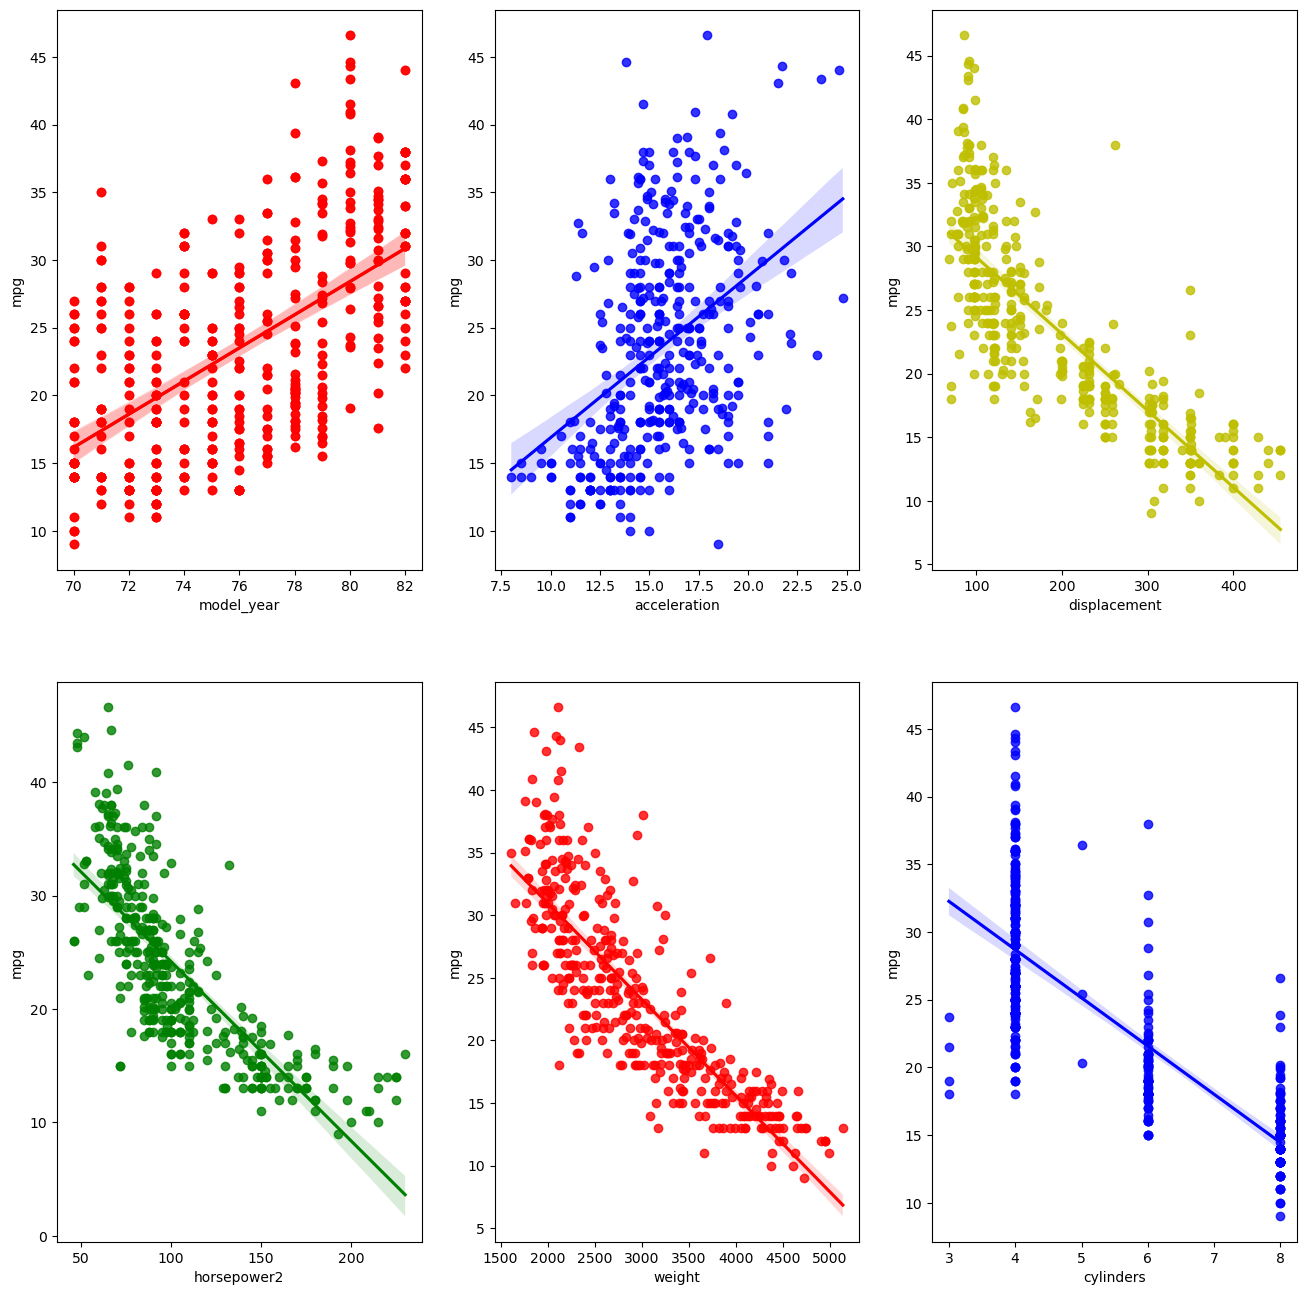

In [19]:
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    plt.show(sns.regplot(x = feature, y = 'mpg', data = data_df, ax = axs[row][col], color = plot_color[i]))

In [20]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))
horsepower2_1 =int(input("horsepower2 : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99
horsepower2 : 150


In [21]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1,horsepower2_1]])

In [22]:
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)

이 자동차의 예상 연비(MPG)는 40.86입니다.
